
# Pipeline_ColumnTransformer_HyperparameterTuning_MLModels_Classification

**--------------------------------------------------------------------------------------------------------------------------**
**--------------------------------------------------------------------------------------------------------------------------**
**--------------------------------------------------------------------------------------------------------------------------**

**STRUCTURE**

*In this notebook, the use of sklearn Pipeline and ColumnTransformer functions for data preprocessing and for the automation of a machine learning workflow is demonstrated. The scope of this project is to predict whether the employees of a bank are likely to exit the company or not (Churn Modelling dataset). The machine learning models, whose performance is to be evaluated in this binary classification problem, are a) Decision Tree, b) Random Forest, c) AdaBoost and d) GradientBoosting Classifier. The fist task of this case study is focused on a) the use of pipelines to select the preprocessing types that are to be applied to the numerical and categorical features of the dataset (e.g. num_features-->Scaling, "MinMaxScaler", cat_features --> categorical data conversion, "OneHotEncoder") and b) the use of ColumnTransformer to apply these transformations to the relevant dataset features.*

*In the second part of this project the use of pipelines for hyperparameter tuning is presented. 'RandomizedSearchCV' function takes as input a set of values for each of the examined machine learning models hyperparameters and does a randomized search (fit & score approach) so as to determine an optimal value for each of them. In contrast to 'GridSearchCV', randomized search combines the hyperparameters values randomly (whereas in 'GridSearchCV' all possible combinations are tested) based on the parameters distribution. The tuning of the models hyperparameters is an important part of ML, as it can improve the model training performance and avoid/minimize overfitting (by making the model less sensitive to noise and by controlling the complexity of its structure). The optimal hyperparameter values determined by the random search are then used by each examined classifier for making predictions on the test set and the 'best' model is the one with the highest average precision score. In terms of the 'best' model's classification performance, its Precision_Recall plot, classification report and confusion matrix are provided.*


**The Dataset (.csv file format) for this project has been obtained from Kaggle:**

"*Churn Modelling*" -- File: "Churn_Modelling.csv" -- Source:https://www.kaggle.com/shubh0799/churn-modelling


In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import classification_report,plot_confusion_matrix,average_precision_score,precision_recall_curve
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the dataset
data=pd.read_csv('Churn_Modelling.csv')

In [3]:
# Dataset first 5 records
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# Dataset Info - Total Feature Entries & Dtypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
# Dataset Features -Basic Descriptive Statistics
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [6]:
# Dropping all the unnecessary  columns (features whose entries are are not going to be uses as inputs during 
# the models training process)
data=data.drop(['RowNumber','CustomerId','Surname'],axis=1)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


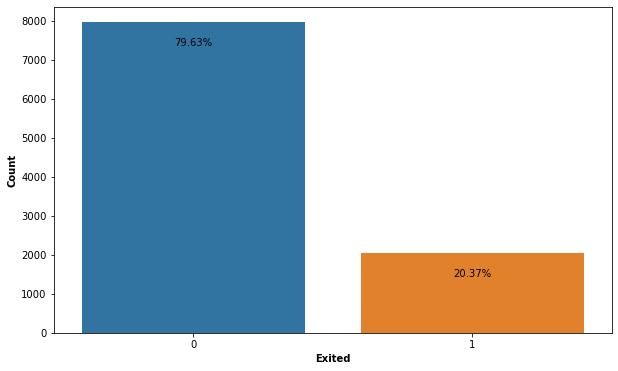

In [7]:
# Due to the binary nature of the dependent(output) parameter (Exited:0/1), the countplot is 
# employed to observe whether or not the data samples are balanced with respect to the target feature entries.
# As expected, the majority of the employees have not exited the bank (79.63%). 
plt.figure(figsize=(10,6))
total = len(data['Exited'])
count_entries=sns.countplot(x='Exited',data=data)
plt.xlabel('Exited',fontweight='bold')
plt.ylabel('Count',fontweight='bold')
for p in count_entries.patches:
    count_entries.annotate('{:.2f}%'.format(100*p.get_height()/total), (p.get_x() + p.get_width() / 2., p.get_height()), 
                               ha = 'center', va = 'center', xytext = (0, -20), textcoords = 'offset points')

In [8]:
# Defining the ML models inputs-output 
X=data.drop('Exited',axis=1)
y=data['Exited']

In [9]:
# Splitting the dataset into train and test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=0)

In [10]:
# Use of pipeline to trasform the dataset features that contain numerical and categorical entries
# MinMaxScaler --> features with numerical/continuous entries
# OneHotEncoder --> categorical features
num_trnsfrm = Pipeline(steps=[('M-Scaler', MinMaxScaler())])
cat_trnsfrm = Pipeline(steps=[('OneHot_Enc', OneHotEncoder(handle_unknown='ignore'))])

In [11]:
# Selecting the Dtypes for the numerical and categorical features transformation (use of ColumnTransformer())
num_feats =X_train.select_dtypes(include=['int64', 'float64']).columns
cat_feats = X_train.select_dtypes(include=['object']).columns
col_trnsfrm = ColumnTransformer(transformers=[('numerical', num_trnsfrm, num_feats),
        ('categorical', cat_trnsfrm, cat_feats)])


In [12]:
# Applying the make_scorer function to select the 'average_precision_score' as the scoring metric of the
# RandomizedSearchCV(). The selection of this 'Precision_Recall' metric is based on the fact that the class imbalance of 
#the target feauture can have a negative effect on the ML model classification performance as the number of false
# negatives becomes high (In this case: false negative --> model has incorrectly predicted that the employees 
# wil not exit the company).

from sklearn.metrics import make_scorer
scoring = make_scorer(average_precision_score)
# Randomized Search to determine the optimal Decision Tree hyperparameter values 
DT_opt_params= { 
    "DTclassifier__splitter":['best', 'random'],
    'DTclassifier__max_depth' : [3,4,5,6,7,8,9],
    'DTclassifier__max_features': ['auto', 'sqrt', 'log2'],
    'DTclassifier__criterion' :['gini', 'entropy']}    

DT = Pipeline(steps=[('col_trnsfrm', col_trnsfrm),
                      ('DTclassifier', DecisionTreeClassifier())])
DT_rand_search = RandomizedSearchCV(DT, DT_opt_params,n_jobs=-1,scoring=scoring) 
DT_rand_search .fit(X_train, y_train) 

DT_rand_search .best_params_
      

{'DTclassifier__splitter': 'best',
 'DTclassifier__max_features': 'sqrt',
 'DTclassifier__max_depth': 7,
 'DTclassifier__criterion': 'entropy'}

In [13]:
# Randomized Search to determine the optimal Random Forest hyperparameter values 
RF_opt_params= { 
    'RFclassifier__n_estimators': [50,100,200,300,400,500],
    'RFclassifier__max_depth' : [3,4,5,6,7,8,9],
    'RFclassifier__max_features': ['auto', 'sqrt', 'log2'],
    'RFclassifier__criterion' :['gini', 'entropy']}    

RF = Pipeline(steps=[('col_trnsfrm', col_trnsfrm),
                      ('RFclassifier', RandomForestClassifier())])
RF_rand_search = RandomizedSearchCV(RF, RF_opt_params,n_jobs=-1,scoring=scoring) 
RF_rand_search .fit(X_train, y_train)  
RF_rand_search .best_params_
    




{'RFclassifier__n_estimators': 500,
 'RFclassifier__max_features': 'sqrt',
 'RFclassifier__max_depth': 9,
 'RFclassifier__criterion': 'gini'}

In [14]:
# Randomized Search to determine the optimal Adaptive Boost hyperparameter values 
ADA_opt_params= { 
    'ADAclassifier__n_estimators': [50,100,200,300,400,500],
    'ADAclassifier__learning_rate' : [0.001,0.005,0.01,0.05,0.10]}
    
ADA = Pipeline(steps=[('col_trnsfrm', col_trnsfrm),
                      ('ADAclassifier', AdaBoostClassifier())])
ADA_rand_search = RandomizedSearchCV(ADA, ADA_opt_params,n_jobs=-1,scoring=scoring) 
ADA_rand_search .fit(X_train, y_train)  
ADA_rand_search .best_params_
    

{'ADAclassifier__n_estimators': 400, 'ADAclassifier__learning_rate': 0.05}

In [15]:
# Randomized Search to determine the optimal Gradient Boosting hyperparameter values 
GB_opt_params= { 
    'GBclassifier__n_estimators': [50,100,200,300,400,500],
    'GBclassifier__max_depth' : [3,4,5,6,7,8,9],
    'GBclassifier__learning_rate' : [0.001,0.005,0.01,0.05,0.10],
    'GBclassifier__max_features': [ 'sqrt', 'log2'],
    'GBclassifier__criterion' :['mse', 'mae']
}  


GB = Pipeline(steps=[('col_trnsfrm', col_trnsfrm),
                      ('GBclassifier', GradientBoostingClassifier())])
GB_rand_search = RandomizedSearchCV(GB, GB_opt_params,n_jobs=-1,scoring=scoring) 
GB_rand_search .fit(X_train, y_train)  
GB_rand_search .best_params_

{'GBclassifier__n_estimators': 200,
 'GBclassifier__max_features': 'log2',
 'GBclassifier__max_depth': 5,
 'GBclassifier__learning_rate': 0.1,
 'GBclassifier__criterion': 'mse'}

In [16]:
# Randomized search best estimator for each ML model
print(DT_rand_search.best_estimator_[1])
print(RF_rand_search.best_estimator_[1])
print(ADA_rand_search.best_estimator_[1])
print(GB_rand_search.best_estimator_[1])

DecisionTreeClassifier(criterion='entropy', max_depth=7, max_features='sqrt')
RandomForestClassifier(max_depth=9, max_features='sqrt', n_estimators=500)
AdaBoostClassifier(learning_rate=0.05, n_estimators=400)
GradientBoostingClassifier(criterion='mse', max_depth=5, max_features='log2',
                           n_estimators=200)


In [17]:
# Pipeline with inputs a) the ColumnTransformer () and b) the best estimator for each ML model
# The scope is to fit the models to the training set and determine the best classifier based on their average precision score
clf_models = [
    DT_rand_search.best_estimator_[1],
    RF_rand_search.best_estimator_[1],
    ADA_rand_search.best_estimator_[1],
    GB_rand_search.best_estimator_[1]
    ]


best_score=0 


for model in clf_models:
    
    clf_pipe= Pipeline(steps=[('col_trnsfrm', col_trnsfrm),('model',model)])
    clf_pipe.fit(X_train, y_train)   
    print(model)
    avg_precision_sc=average_precision_score(y_train,clf_pipe.predict_proba(X_train)[:,1])
 
    print("Score: %.4f" % avg_precision_sc)
    print('\r')
    
    if  avg_precision_sc> best_score:
        best_score=avg_precision_sc
        best_model=model
print('------------------------------------------------------------')
print('\r')   
print("Best Classifier:\n{} ".format(best_model))
print('\r') 
print("Best Score: ---> {} ".format(best_score))






DecisionTreeClassifier(criterion='entropy', max_depth=7, max_features='sqrt')
Score: 0.6193

RandomForestClassifier(max_depth=9, max_features='sqrt', n_estimators=500)
Score: 0.8288

AdaBoostClassifier(learning_rate=0.05, n_estimators=400)
Score: 0.6783

GradientBoostingClassifier(criterion='mse', max_depth=5, max_features='log2',
                           n_estimators=200)
Score: 0.8856

------------------------------------------------------------

Best Classifier:
GradientBoostingClassifier(criterion='mse', max_depth=5, max_features='log2',
                           n_estimators=200) 

Best Score: ---> 0.8856400639686223 


In [18]:
# Pipeline consisting of the ColumnTransformer() and the model with the best average precision score to make 
# predictions on the test set
best_clf_pipe= Pipeline(steps=[('col_trnsfrm', col_trnsfrm),('model',best_model)])   
y_prob=best_clf_pipe.predict_proba(X_test)# predicting the probability
y_pred=best_clf_pipe.predict(X_test)# predicting the class

In [19]:
# Probablity that an employee a) will not exit (1st column- Class:0), b) will exit (2nd column- Class:1)
y_prob

array([[0.76731865, 0.23268135],
       [0.6844691 , 0.3155309 ],
       [0.82860919, 0.17139081],
       ...,
       [0.91737812, 0.08262188],
       [0.82680627, 0.17319373],
       [0.84565226, 0.15434774]])

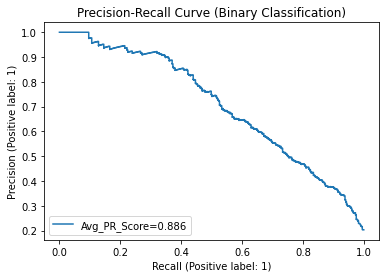

In [20]:
# Best score model - Precision_Recall Curve

# When dealing with imbalance data, it is more meaningful to use the Precision_Recall curve instead of the ROC  
# curve because precision does not take into account the large number of  negative samples as 
# precision = True Positives /(True Positives + False Positives) and as a result the Precision_Recall curve 
# describes better the minority class (Class:1- employees that exited)
# On the other hand, the False Positive Rate of the ROC metric is: False Pos/ (False Pos + True Negative). 
# At the presence of an imbalance class the True Negative number is large and as a result the significance of
# False Positive Rate becomes low.

from sklearn.metrics import plot_precision_recall_curve

plot_precision_recall_curve(best_clf_pipe, X_test, y_test,label='Avg_PR_Score={0:0.3f}'.format(best_score))
plt.title('Precision-Recall Curve (Binary Classification)')
plt.show();


In [21]:
# Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1595
           1       0.72      0.53      0.61       405

    accuracy                           0.86      2000
   macro avg       0.80      0.74      0.76      2000
weighted avg       0.85      0.86      0.85      2000



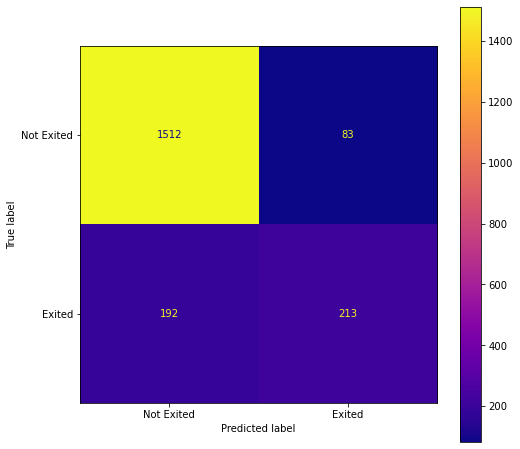

In [22]:
# Confusion Matrix
fig, axs = plt.subplots(figsize=(8,8))
plot_confusion_matrix(best_clf_pipe,X_test,y_test,values_format='d',
                      display_labels=['Not Exited','Exited'],cmap='plasma',ax=axs);